# 第八次作业

## n-step TD

[参考资料](https://applenob.github.io/rl_note/intro-note-7/)

![n-step TD](https://applenob.github.io/rl_note/intro-note-7/n-step-est.png)

&emsp;&emsp; $n~$步更新的方法依然属于时序差分方法，因为在这些方法中，前面状态的估计值会根据它与后继状态的估计值的差异进行更新。不同的是，这里的后继状态是n步后的状态，而不是紧接当前状态的下一个时刻的状态。任意$n~$步更新的目标是$n~$步回报
$$
G_{t:t+n} \doteq R_{t+1}+\gamma R_{t+2}+\ldots+\gamma^{n-1} R_{t+n}+\gamma^{n} V_{t+n+1}\left(S_{t+n}\right)  
$$
&emsp;&emsp; $n~$步回报的状态价值函数更新算法
$$
V_{t+n}(S_t) \doteq V_{t+n-1}(S_t)+\alpha[G_{t:t+n}-V_{t+n-1}(S_t)], ~ 0 \leq t \leq T
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
# 状态数
N_STATES = 19

# 折扣系数
GAMMA = 1

# 除终点外的所有状态
STATES = np.arange(1, N_STATES + 1)

# 开始的状态
START_STATE = 10

# 结束的状态
END_STATES = [0, N_STATES + 1]

# 真实的Value值
# 向左终点状态移动的动作的reward为-1
# 向右终点状态移动的动作的reward为1
TRUE_VALUE = np.arange(-20, 22, 2) / 20.0
TRUE_VALUE[0] = TRUE_VALUE[-1] = 0

In [7]:
# n-steps TD 方法
def temporal_difference(value, n, alpha):
    # 初始化开始状态
    state = START_STATE
    states = [state]

    # 存储状态和奖励的数组
    rewards = [0]

    time = 0

    T = float('inf')

    while True:
        time += 1

        if time < T:
            if np.random.binomial(1, 0.5) == 1:
                next_state = state + 1
            else:
                next_state = state - 1

            if next_state == 0:
                reward = -1
            elif next_state == N_STATES + 1:
                reward = 1
            else:
                reward = 0

            # 存储新的状态和reward
            states.append(next_state)
            rewards.append(reward)

            if next_state in END_STATES:
                T = time

        # 当前正在更新的状态所在的时刻
        update_time = time - n
        if update_time >= 0:
            returns = 0.0
            # 计算相应的奖励
            for i in range(update_time + 1, min(T, update_time + n) + 1):
                returns += pow(GAMMA, i - update_time - 1) * rewards[i]
            if update_time + n <= T:
                returns += pow(GAMMA, n) * value[states[(update_time + n)]]
            state_to_update = states[update_time]
            # 更新状态的value
            if not state_to_update in END_STATES:
                value[state_to_update] += alpha * (returns - value[state_to_update])

        if update_time == T - 1:
            break
        state = next_state


In [8]:
# 结果展示
def show():
    # 选取n为[1 2 4 8 16 32 64 128 256 512]作比较
    ns = np.power(2, np.arange(0, 10))

    # 选取alpha为[0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1]
    alphas = np.arange(0, 1.1, 0.1)

    # 每次run有10次episodes
    episodes = 10
    runs = 100

    errors = np.zeros((len(ns), len(alphas)))
    for run in tqdm(range(0, runs)):
        for n_id, n in enumerate(ns):
            for alpha_id, alpha in enumerate(alphas):
                value = np.zeros(N_STATES + 2)
                for ep in range(0, episodes):
                    temporal_difference(value, n, alpha)
                    errors[n_id, alpha_id] += np.sqrt(np.sum(np.power(value - TRUE_VALUE, 2)) / N_STATES)
    # 取平均值
    errors /= episodes * runs

    for i in range(0, len(ns)):
        plt.plot(alphas, errors[i, :], label='n = %d' % (ns[i]))
    plt.xlabel('alpha')
    plt.ylabel('RMS error')
    plt.ylim([0.25, 0.55])
    plt.legend()
    plt.show()
    plt.close()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [10:20<00:00,  6.21s/it]


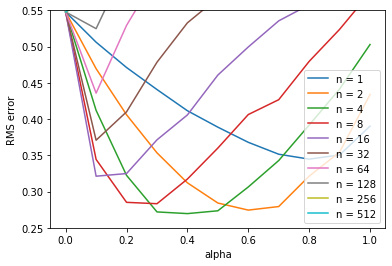

In [9]:
show()